# An Overview of the Spanish Energy Generation

In [1]:
import pandas as pd #!

df_energy = pd.read_csv('all-technology_2019-2021.csv', index_col=0)
df_energy

,technology,year,month,day,hour,generation_mwh
0,Carbon,2019,1,1,0,1867.0
1,Carbon,2019,1,1,1,1618.0
2,Carbon,2019,1,1,2,1535.3
3,Carbon,2019,1,1,3,1344.0
4,Carbon,2019,1,1,4,1345.0
...,...,...,...,...,...,...
420859,Other Renewables,2021,12,31,19,602.7
420860,Other Renewables,2021,12,31,20,608.2
420861,Other Renewables,2021,12,31,21,606.7
420862,Other Renewables,2021,12,31,22,607.5


In [4]:
mask = df_energy.technology.str.contains('total', case=False)

In [8]:
df_energy = df_energy[~mask]

## [ ] Select the data from 2021

### Filter the rows

In [9]:
mask = df_energy.year == 2021

df = df_energy[mask].copy()
df

,technology,year,month,day,hour,generation_mwh
17544,Carbon,2021,1,1,0,250.0
17545,Carbon,2021,1,1,1,250.0
17546,Carbon,2021,1,1,2,243.0
17547,Carbon,2021,1,1,3,265.0
17548,Carbon,2021,1,1,4,250.0
...,...,...,...,...,...,...
420859,Other Renewables,2021,12,31,19,602.7
420860,Other Renewables,2021,12,31,20,608.2
420861,Other Renewables,2021,12,31,21,606.7
420862,Other Renewables,2021,12,31,22,607.5


In [12]:
df_energy.to_csv('energy_2021.csv', index=False)

In [14]:
df_energy = pd.read_csv('energy_2021.csv')
df_energy

,technology,year,month,day,hour,generation_mwh
0,Carbon,2019,1,1,0,1867.0
1,Carbon,2019,1,1,1,1618.0
2,Carbon,2019,1,1,2,1535.3
3,Carbon,2019,1,1,3,1344.0
4,Carbon,2019,1,1,4,1345.0
...,...,...,...,...,...,...
368251,Other Renewables,2021,12,31,19,602.7
368252,Other Renewables,2021,12,31,20,608.2
368253,Other Renewables,2021,12,31,21,606.7
368254,Other Renewables,2021,12,31,22,607.5


### Drop the column `year`

In [3]:
df = df.drop(columns='year')
df

,technology,month,day,hour,generation_mwh
17544,Carbon,1,1,0,250.0
17545,Carbon,1,1,1,250.0
...,...,...,...,...,...
420862,Other Renewables,12,31,22,607.5
420863,Other Renewables,12,31,23,591.6


### Reset the index to start from 0

In [4]:
df = df.reset_index(drop=True)
df

,technology,month,day,hour,generation_mwh
0,Carbon,1,1,0,250.0
1,Carbon,1,1,1,250.0
...,...,...,...,...,...
140158,Other Renewables,12,31,22,607.5
140159,Other Renewables,12,31,23,591.6


## In total, how much energy was generated?

In [5]:
df.generation_mwh.sum()

252448090.89999998

## [ ] Which was the technology that generated more energy?

### Data processing

#### Calculate the total generation by each technology

In [21]:
res = df.groupby('technology').generation_mwh.sum()
res

technology
Carbon            5016801.7
Cogeneration     26373562.5
                    ...    
Total Exports   -20155317.7
Total Imports    21604101.0
Name: generation_mwh, Length: 16, dtype: float64

#### Sort the most used technologies at the beginning of the table

In [22]:
res = res.sort_values(ascending=False)
res

technology
Eolic              59798598.5
Nuclear            54124826.1
                      ...    
Other Residuals     1019779.2
Total Exports     -20155317.7
Name: generation_mwh, Length: 16, dtype: float64

#### Reset the index to transform the previous object to a `DataFrame`

In [23]:
dfres = res.reset_index()
dfres

,technology,generation_mwh
0,Eolic,59798598.5
1,Nuclear,54124826.1
...,...,...
14,Other Residuals,1019779.2
15,Total Exports,-20155317.7


### Visualize the data with a bar plot

In [24]:
import plotly.express as px

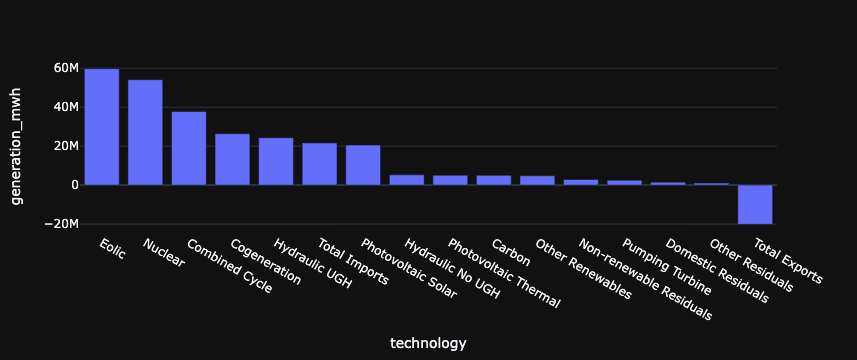

In [25]:
px.bar(data_frame=dfres, x='technology', y='generation_mwh')

### Customize the bar plot

#### Make the bars horizontal

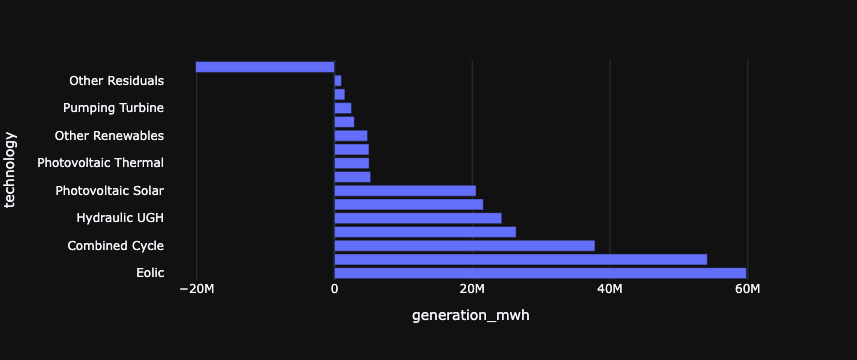

In [26]:
px.bar(data_frame=dfres, y='technology', x='generation_mwh')

#### Sort the data and visualize it again

In [27]:
dfres = dfres.sort_values('generation_mwh')
dfres

,technology,generation_mwh
15,Total Exports,-20155317.7
14,Other Residuals,1019779.2
...,...,...
1,Nuclear,54124826.1
0,Eolic,59798598.5


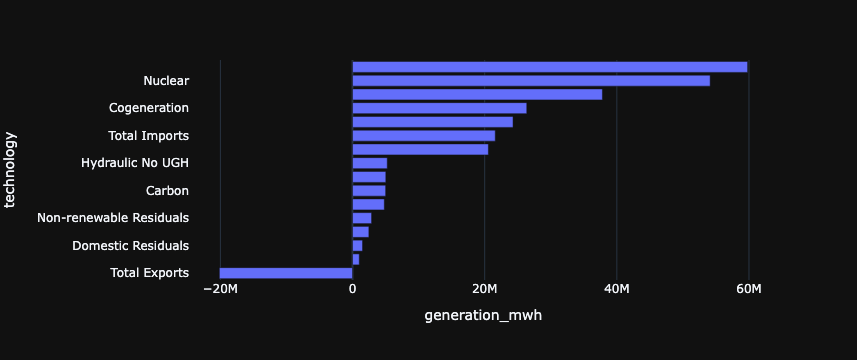

In [29]:
px.bar(data_frame=dfres, y='technology', x='generation_mwh')

### Is a pie plot better for this data?

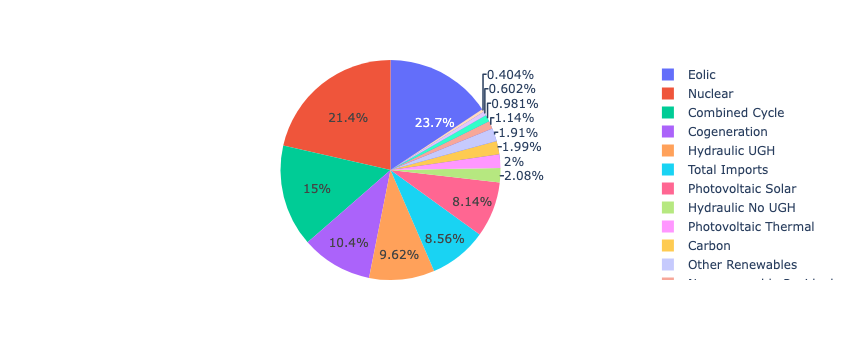

In [14]:
px.pie(data_frame=dfres, names='technology', values='generation_mwh')

## [ ] Which was the month that demanded more energy?

### Data processing

In [15]:
dfres = df.groupby('month').generation_mwh.sum().reset_index()

In [16]:
dfres

,month,generation_mwh
0,1,23787666.7
1,2,20381224.3
...,...,...
10,11,20931334.3
11,12,21807917.7


### Data visualization

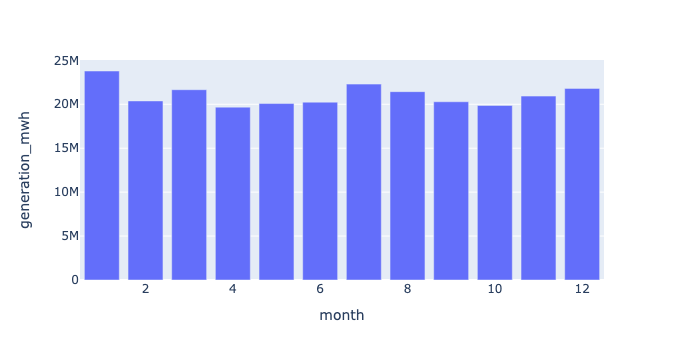

In [17]:
px.bar(data_frame=dfres, x='month', y='generation_mwh')

## [ ] Which was the month-technology that generated more energy?

### Data processing

In [18]:
dfres = df.groupby(['month', 'technology']).generation_mwh.sum().reset_index()
dfres

,month,technology,generation_mwh
0,1,Carbon,569862.6
1,1,Cogeneration,2404774.2
...,...,...,...
190,12,Total Exports,-2495604.4
191,12,Total Imports,1180193.4


### Data visualization

#### Create a bar plot

##### Differentiate each technology with a `color`

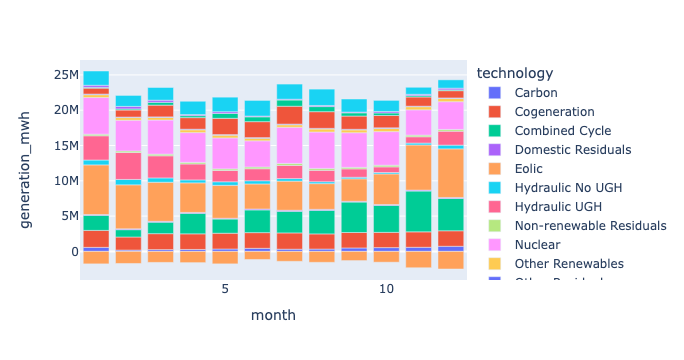

In [19]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', color='technology')

##### Differentiate each technology with a `facet_col`

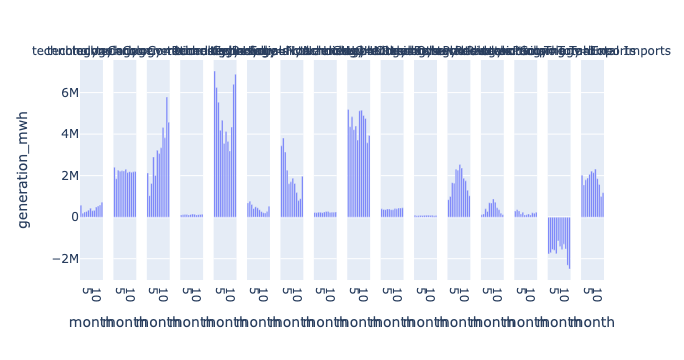

In [20]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', facet_col='technology')

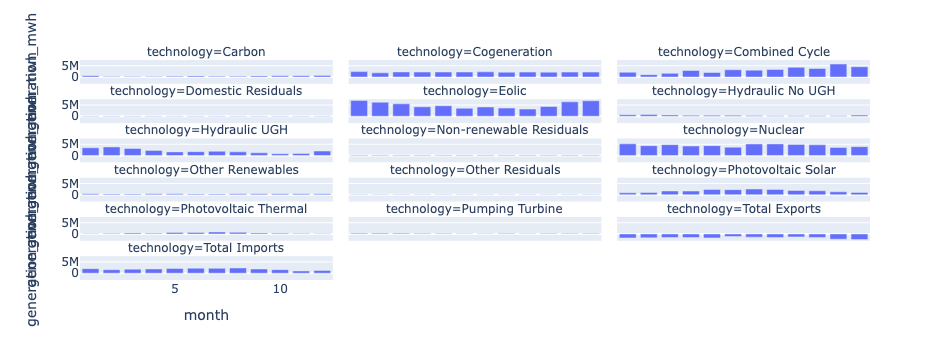

In [21]:
px.bar(data_frame=dfres, x='month', y='generation_mwh',
       facet_col='technology', facet_col_wrap=3)

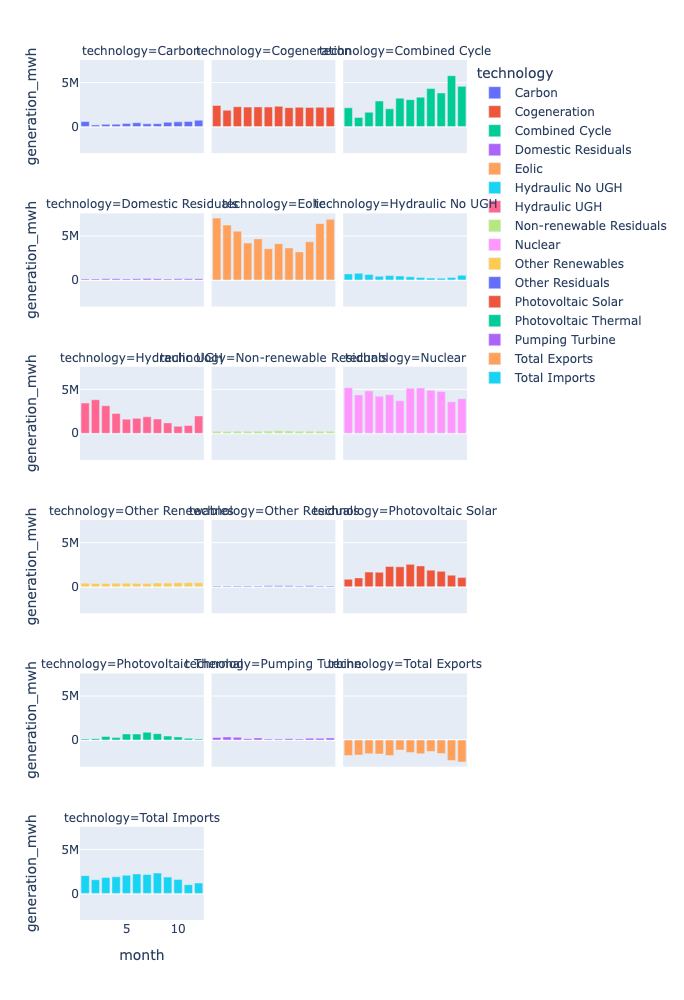

In [22]:
px.bar(data_frame=dfres, x='month', y='generation_mwh',
       facet_col='technology', facet_col_wrap=3, height=1000, color='technology')

#### Create an area plot

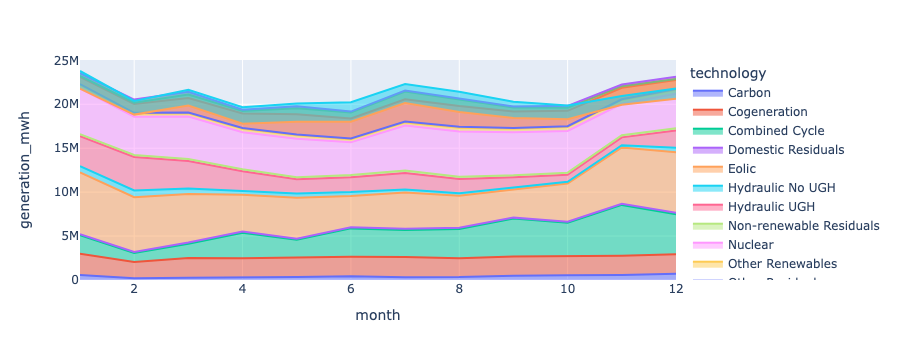

In [23]:
px.area(data_frame=dfres, x='month', y='generation_mwh', color='technology')

## [ ] How much energy was generated each hour of the year?

### Data Processing

In [24]:
res = df.groupby(['month', 'day', 'hour']).generation_mwh.sum()

In [25]:
res

month  day  hour
1      1    0       26026.1
            1       25165.1
                     ...   
12     31   22      24625.9
            23      22817.6
Name: generation_mwh, Length: 8759, dtype: float64

In [26]:
365*24

8760

### Data visualization

#### Create a histogram

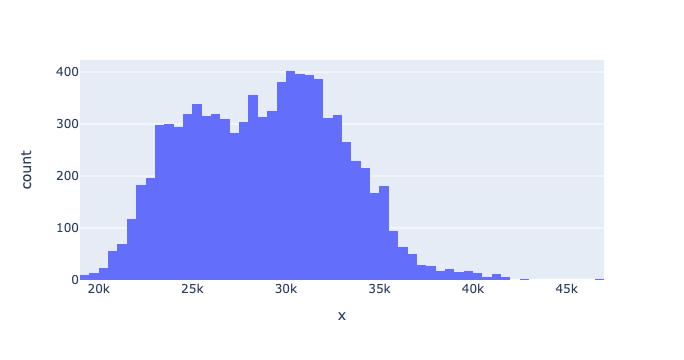

In [27]:
px.histogram(x=res)

#### Create a boxplot

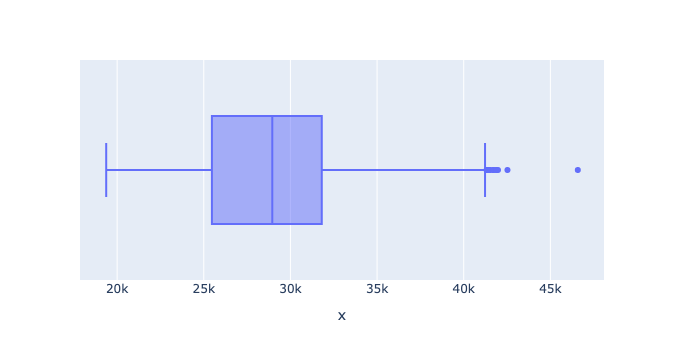

In [28]:
px.box(x=res)